# Net Load Visualization

This notebook demonstrates how to use create a unique net load visualization using data from the Grid Status API and Plotly

For more information about the API, please visit: https://www.gridstatus.io/api

In [1]:
import plotly.graph_objects as go

import gridstatusio

gridstatusio.__version__

'0.8.0'

## Setting up the API client

First, we need to set up the GridStatusClient by providing our API key. You can either set the API key using the GRIDSTATUS_API_KEY environment variable or pass it to the constructor directly.

In [2]:
# gridstatusio.GridStatusClient(api_key="YOUR_API_KEY_HERE")
client = gridstatusio.GridStatusClient()

GridStatusClient(host=https://api.gridstatus.io/v1)

## Query Data

Select the ISO and date range to get data for. Specify `timezone` to set the time zone of timestamp in the returned data. Make sure to set `limit` to avoid quickly using your monthly API row allotment

In [3]:
QUERY_LIMIT = 10_000

10000

In [4]:
# pick ISO to visualize (ercot, caiso, pjm, miso, isone, nyiso, spp)
ISO = "ercot"
START = "Jul 1, 2023"
END = "Aug 1, 2023"

df = client.get_dataset(
    dataset=f"{ISO}_standardized_hourly",
    start=START,
    end=END,
    timezone="US/Central",
    limit=QUERY_LIMIT,
)

df

Fetching Page 1...Done in 0.35 seconds. 
Total rows: 744/10,000 (7.44% of limit)

Total number of rows: 744


interval_start_local        interval_start_utc  \
0   2023-07-01 00:00:00-05:00 2023-07-01 05:00:00+00:00   
1   2023-07-01 01:00:00-05:00 2023-07-01 06:00:00+00:00   
2   2023-07-01 02:00:00-05:00 2023-07-01 07:00:00+00:00   
3   2023-07-01 03:00:00-05:00 2023-07-01 08:00:00+00:00   
4   2023-07-01 04:00:00-05:00 2023-07-01 09:00:00+00:00   
..                        ...                       ...   
739 2023-07-31 19:00:00-05:00 2023-08-01 00:00:00+00:00   
740 2023-07-31 20:00:00-05:00 2023-08-01 01:00:00+00:00   
741 2023-07-31 21:00:00-05:00 2023-08-01 02:00:00+00:00   
742 2023-07-31 22:00:00-05:00 2023-08-01 03:00:00+00:00   
743 2023-07-31 23:00:00-05:00 2023-08-01 04:00:00+00:00   

           interval_end_local          interval_end_utc  \
0   2023-07-01 01:00:00-05:00 2023-07-01 06:00:00+00:00   
1   2023-07-01 02:00:00-05:00 2023-07-01 07:00:00+00:00   
2   2023-07-01 03:00:00-05:00 2023-07-01 08:00:00+00:00   
3   2023-07-01 04:00:00-05:00 2023-07-01 09:00:00+00:00   
4   2023-07-01 05:00:00-05:00 2023-07-01 10:00:00+00:00   
..                        ...                       ...   
739 2023-07-31 20:00:00-05:00 2023-08-01 01:00:00+00:00   
740 2023-07-31 21:00:00-05:00 2023-08-01 02:00:00+00:00   
741 2023-07-31 22:00:00-05:00 2023-08-01 03:00:00+00:00   
742 2023-07-31 23:00:00-05:00 2023-08-01 04:00:00+00:00   
743 2023-08-01 00:00:00-05:00 2023-08-01 05:00:00+00:00   

     load_forecast.load_forecast    net_load  renewables  \
0                    57_706.7357 42_435.5833 14_946.2417   
1                    54_772.3169 39_245.3833 15_184.2333   
2                    52_407.7856 39_752.4917 12_695.8167   
3                    50_895.3502 39_481.4750 11_229.9083   
4                    49_704.2525 38_177.8833 11_296.8083   
..                           ...         ...         ...   
739                  79_744.2561 66_683.4833 13_167.9083   
740                  77_097.1235 66_611.4167 10_539.8083   
741                  74_676.1808 63_102.4583 12_050.8417   
742                  71_646.7091 56_603.1167 14_711.1000   
743                  67_864.4721 48_990.1000 17_986.5250   

     renewables_to_load_ratio   load.load  fuel_mix.coal_and_lignite  \
0                      0.2605 57_371.5833                 9_991.0417   
1                      0.2790 54_418.9167                 8_444.6667   
2                      0.2422 52_418.2500                 8_848.0833   
3                      0.2215 50_700.0000                 8_844.1083   
4                      0.2284 49_464.6667                 7_679.1000   
..                        ...         ...                        ...   
739                    0.1653 79_682.6667                11_549.1250   
740                    0.1369 76_981.2500                11_686.5917   
741                    0.1604 75_128.3333                11_712.9750   
742                    0.2063 71_309.8333                11_491.5667   
743                    0.2686 66_972.3333                10_759.1833   

     fuel_mix.hydro  fuel_mix.nuclear  fuel_mix.power_storage  fuel_mix.solar  \
0           10.2417        4_647.8250                 52.0583          0.0750   
1           10.7000        4_648.1250                 90.7833          0.1333   
2           30.0583        4_648.1333                 39.9000          0.1750   
3           11.3833        4_648.1750                  5.6000          0.0917   
4           10.0250        4_649.5083                  0.5500          0.1000   
..              ...               ...                     ...             ...   
739        168.7250        4_925.4750                759.9667      3_143.3333   
740        169.9750        4_927.7667                590.5333        218.0917   
741         24.9667        4_930.8583                197.5083         12.2833   
742          4.3833        4_937.4083                161.4333         10.3000   
743          4.2917        4_937.3250                 57.9500          0.3250   

     fuel_mix.wind  fuel_mix.nat

## Make Graph

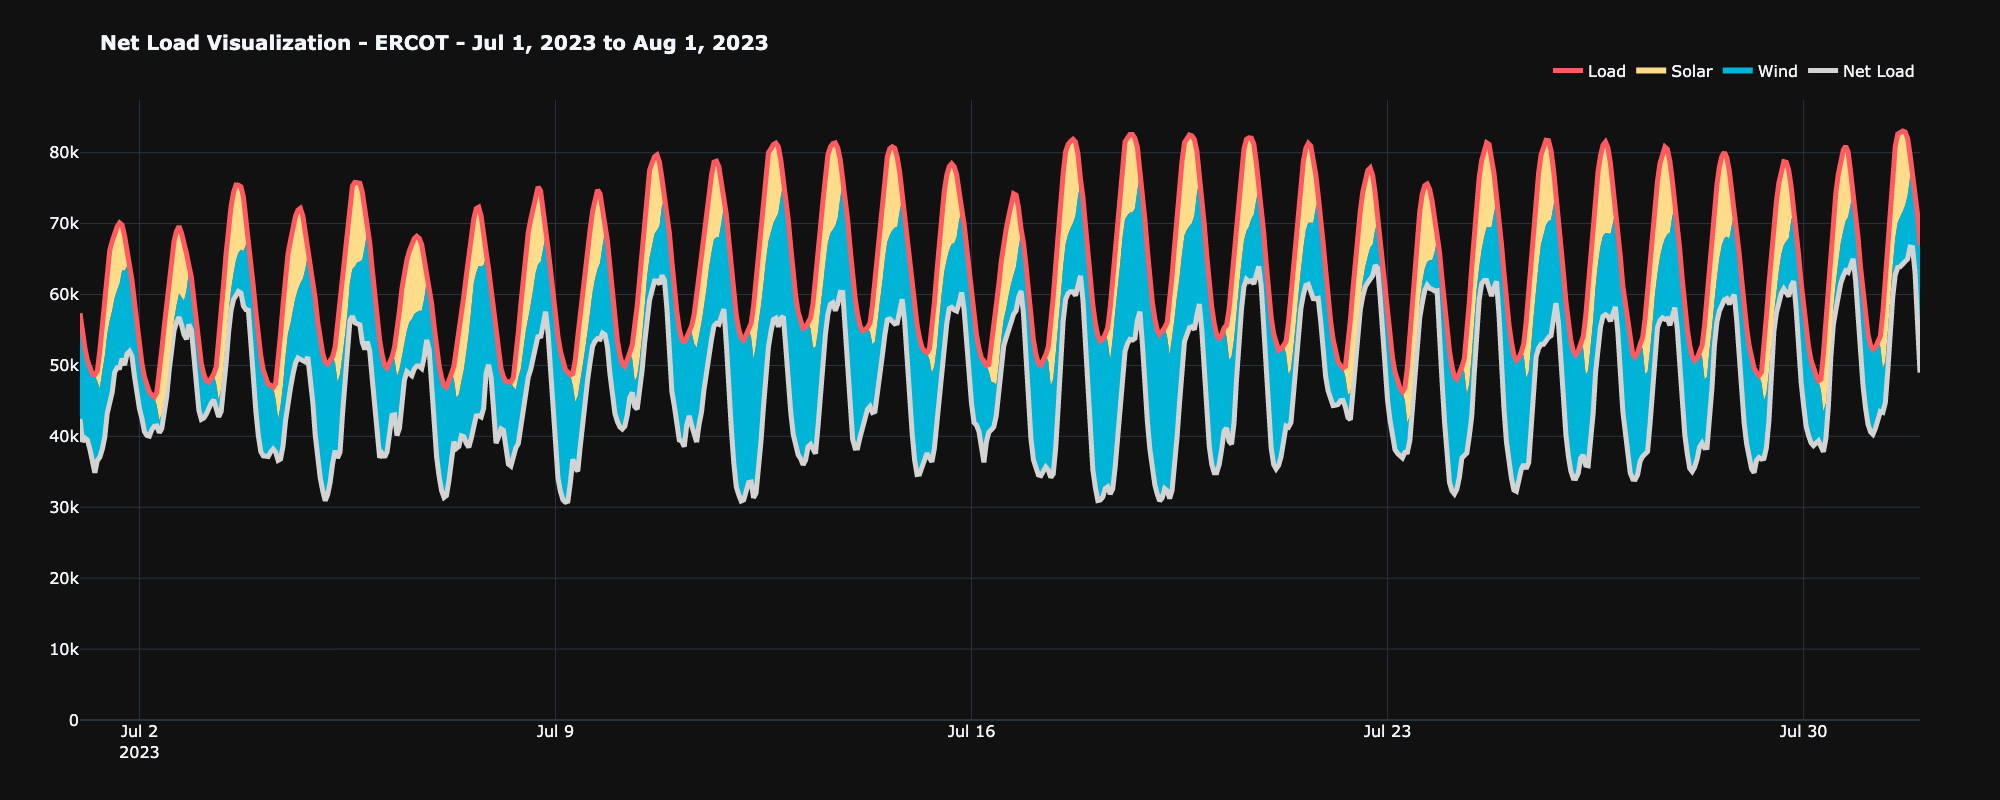

In [5]:
fig = go.Figure()

# define colors
yellow = "#ffdc89"
light_blue = "#00b4d8"
purple = "#9b59b6"
gray = "#D3D3D3"
red = "#ff5a5f"


# add traces
fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["net_load"],
        name="Net Load",
        stackgroup="one",
        fill="none",
        line=dict(color=gray, width=5),
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["fuel_mix.wind"],
        name="Wind",
        fill="tonexty",
        stackgroup="one",
        mode="none",
        fillcolor=light_blue,
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["fuel_mix.solar"],
        name="Solar",
        fill="tonexty",
        stackgroup="one",
        mode="none",
        fillcolor=yellow,
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["load.load"],
        name="Load",
        mode="lines",
        line=dict(color=red, width=5),
    )
)

# Horizontal legend
fig.update_layout(
    template="plotly_dark",
    title=f"<b>Net Load Visualization - {ISO.upper()} - {START} to {END} </b>",
    # bold title
    title_font=dict(size=20),
    font=dict(size=16),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
)

fig.show("png", width=2000, height=800)